# Machine Learning
### k-Nearest Neighbors (from scratch)

Dans ce notebook, nous allons coder un algorithme de classification très simple : le $k$-nn.

On commence par importer quelques modules python importants :

- Numpy : pour des claculs (algèbre linéaire, etc)
- Pandas : pour la lecture des fichiers csv, etc 

In [11]:
import numpy as np
import pandas as pa

import warnings
warnings.filterwarnings("ignore")

#### Etape 1 : on écrit une fonction pour calculer la distance (euclidienne) entre deux vecteurs :

In [12]:
def euclidean(u, v):
    return np.sqrt(np.sum((u - v)*(u - v)))

u = np.array([1, 2, 3])
v = np.array([1, 2, 3])
w = np.array([2, 3, 4])
print(euclidean(u, v))
print(euclidean(u, w))

0.0
1.7320508075688772


Une fonction pour calculer les distances d'un vecteur à tous les autres vecteurs d'un dataset:

In [13]:
def distances(u, dataset):
    dist = []
    for d in dataset:
        dist.append(euclidean(u, d))
    return dist

u = np.array([1, 2, 3])
dataset = np.array([[1, 2, 3, 0],
                   [2, 3, 4, 1],
                   [3, 4, 5, 1],
                   [4, 5, 6, 0]])
print(dataset[:, 0:3])
dist = distances(u, dataset[:, 0:3])

print(dist)

[[1 2 3]
 [2 3 4]
 [3 4 5]
 [4 5 6]]
[0.0, 1.7320508075688772, 3.4641016151377544, 5.196152422706632]


#### Etape 2 : on récupère la liste des $k$ voisins les plus proches

In [15]:
def voisins(u, datatset, k):
    distances = []
    for d in dataset:
        v = d[0:len(d)-1]
        distances.append((d, euclidean(u, v)))
    distances.sort(key=lambda tup: tup[1])
    neighs = []
    for i in range(k):
        neighs.append(distances[i][0])
    return neighs

u = np.array([1, 2, 3])
dataset = np.array([[1, 2, 3, 1],
                   [2, 3, 4, 1],
                   [3, 4, 5, 0],
                   [4, 5, 6, 0]])
print(voisins(u, dataset, k=2))

[array([1, 2, 3, 1]), array([2, 3, 4, 1])]


#### Etape 3 : faire des prédictions

In [19]:
def classify(u, dataset, k):
    v = voisins(u, dataset, k)
    classes = {0:0, 1:0}
    for e in v:
        classes[e[-1]] += 1
    if classes[0] > classes[1]:
        return 0
    return 1    
    
u = np.array([4, 5, 6])
dataset = np.array([[1, 2, 3, 0],
                   [2, 3, 4, 1],
                   [3, 4, 5, 0],
                   [4, 5, 6, 1],
                   [1, 2, 3, 0]])
#print(distances(u, dataset))
print(classify(u, dataset, k=2))

1


### Voyons ce que ça donne sur des données synthétiques

In [29]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_redundant=0, n_informative=2)
print(y)

[1 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0
 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0
 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 1
 1 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1
 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1
 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0
 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1
 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 0 0 1 1 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0
 1 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1
 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0
 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0
 1 0 1 0 0 0 0 0 0 0 1 0 

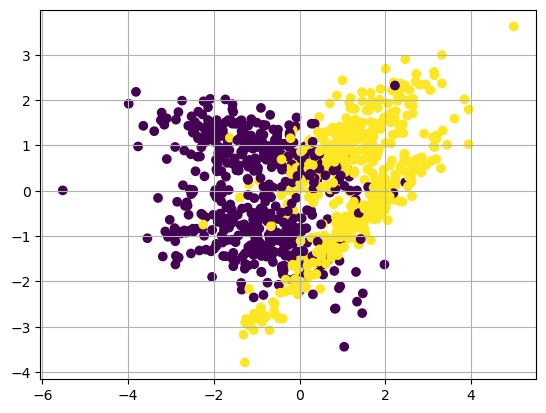

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.grid()
plt.scatter(X[:,0], X[:,1],c=y)

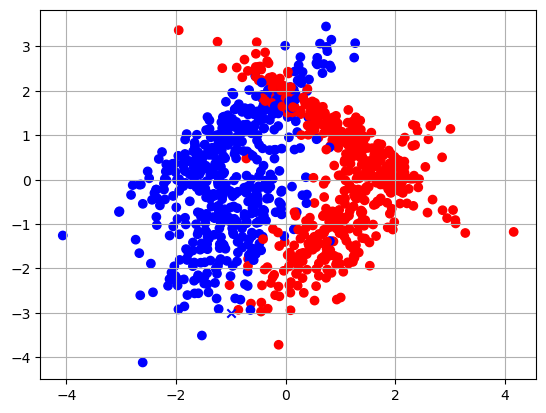

In [39]:
x = (-1, -3)
dataset = [np.append(X[i], y[i]) for i in range(len(X))]
y_hat = classify(x, dataset, 10)
colors = ['red' if y[i]==1 else 'blue' for i in range(len(y))]
plt.grid()
plt.scatter(X[:,0], X[:,1], color=colors)
color = 'red' if y_hat==1 else 'blue'
plt.scatter(x[0], x[1], c=color, marker='x')

### Voyons ce que ça donne sur un exemple plus conséquent

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.target[iris.target==2] = 1
dataset = [np.append(iris.data[i][:2],iris.target[i]) for i in range(len(iris.data))]
#print(dataset)

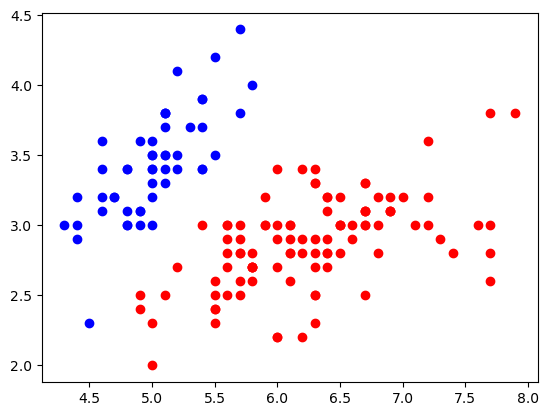

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
colors = {0: 'blue', 1: 'red'}
for i in range(len(iris.data)):
    plt.scatter(iris.data[i][0:1], iris.data[i][1:2], color=colors[iris.target[i]])

In [8]:
u = np.array([6.5, 2.5])
#print(dataset)
classifier(u, dataset, k=3)

1

6.5
2.5


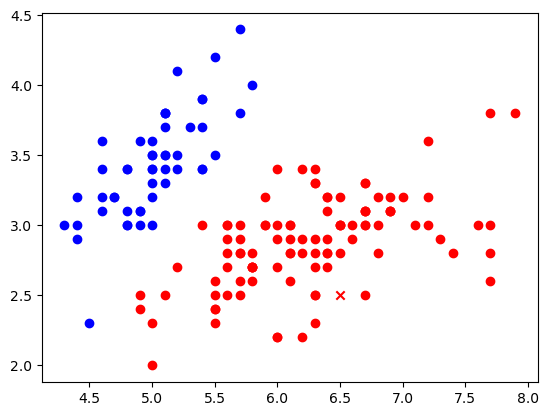

In [9]:
u = np.array([6.5, 2.5])

colors = {0: 'blue', 1: 'red'}
iris.target[iris.target==2] = 1
for i in range(len(iris.data)):
    #print(iris.target[i])
    plt.scatter(iris.data[i][0:1], iris.data[i][1:2], color=colors[iris.target[i]])
print(u[0])
print(u[1])
plt.scatter(u[0],u[1], color=colors[classifier(u, dataset, k=3)], marker='x')